In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Library to split data 
from sklearn.model_selection import train_test_split


# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')
df.head(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

# Outlier and Null value Treatment

In [4]:
# The following df will drop about 10 rows with outliers 
df = df[df['MonthlyIncome']<80000]
df = df[df['MonthlyIncome']>7000]
df = df[df['NumberOfTrips']<15]

In [5]:
df['Age'] = df['Age'].replace(np.nan,round(df['Age'].mean(),0))
df['NumberOfFollowups'] = df['NumberOfFollowups'].replace(np.nan,round(df['NumberOfFollowups'].mean(),0))
df['DurationOfPitch'] = df['DurationOfPitch'].replace(np.nan,round(df['DurationOfPitch'].mean(),0))
df['PreferredPropertyStar'] = df['PreferredPropertyStar'].replace(np.nan,round(df['PreferredPropertyStar'].mean(),0))
df['NumberOfChildrenVisiting'] = df['NumberOfChildrenVisiting'].replace(np.nan,round(df['NumberOfChildrenVisiting'].mean(),0))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4507 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4507 non-null   int64  
 1   ProdTaken                 4507 non-null   int64  
 2   Age                       4507 non-null   float64
 3   TypeofContact             4507 non-null   object 
 4   CityTier                  4507 non-null   int64  
 5   DurationOfPitch           4507 non-null   float64
 6   Occupation                4507 non-null   object 
 7   Gender                    4507 non-null   object 
 8   NumberOfPersonVisiting    4507 non-null   int64  
 9   NumberOfFollowups         4507 non-null   float64
 10  ProductPitched            4507 non-null   object 
 11  PreferredPropertyStar     4507 non-null   float64
 12  MaritalStatus             4507 non-null   object 
 13  NumberOfTrips             4507 non-null   float64
 14  Passport

# Univarite and Bivariate Analysis

## Product Taken

<AxesSubplot:xlabel='ProdTaken', ylabel='count'>

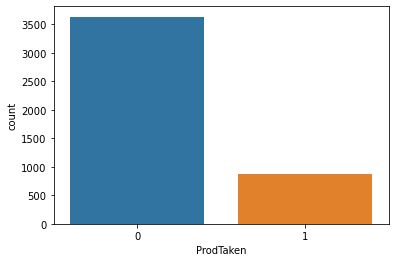

In [7]:
sns.countplot(df['ProdTaken'])

### Product Taken vs. Age

<AxesSubplot:xlabel='ProdTaken', ylabel='Age'>

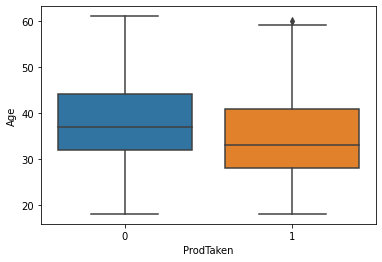

In [8]:
sns.boxplot(data=df,x='ProdTaken',y='Age')

### Product Taken vs. Duration Of Pitch

<AxesSubplot:xlabel='DurationOfPitch'>

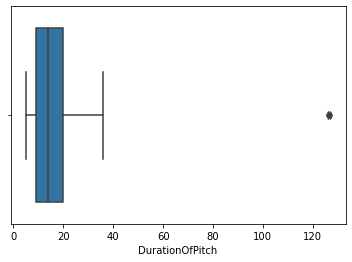

In [9]:
#First Ill check the durations of calls in general
sns.boxplot(df['DurationOfPitch'])

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

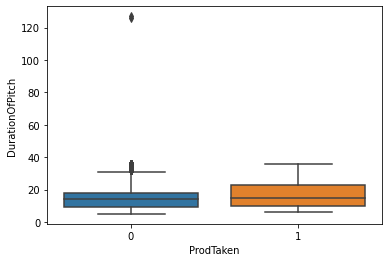

In [10]:
sns.boxplot(data=df,x='ProdTaken',y='DurationOfPitch')

In [11]:
df = df[df['DurationOfPitch']<100]

<AxesSubplot:xlabel='ProdTaken', ylabel='DurationOfPitch'>

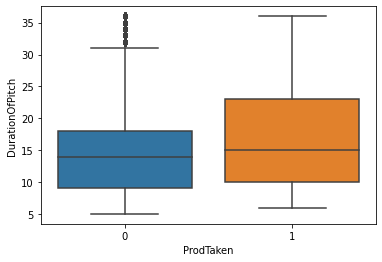

In [12]:
sns.boxplot(data=df,x='ProdTaken',y='DurationOfPitch')

In general, longer pitches have higher success.

### Product Taken vs. Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

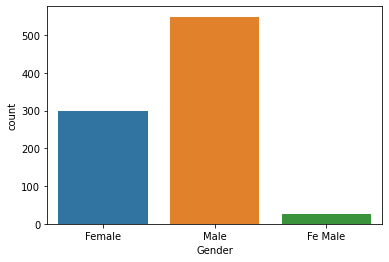

In [13]:
# I will make a DataFrame for all the people who bought a product
Prod_Taken = df[df['ProdTaken']==1]
sns.countplot(Prod_Taken['Gender'])

In [14]:
# Gender category needs correction  
df['Gender'] = df['Gender'].replace('Fe Male', 'Female')
Prod_Taken['Gender'] = Prod_Taken['Gender'].replace('Fe Male', 'Female')

<AxesSubplot:xlabel='Gender', ylabel='count'>

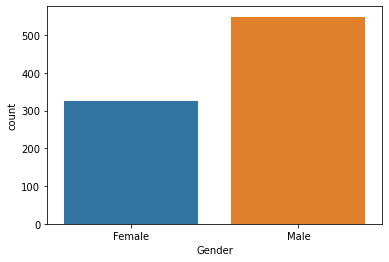

In [15]:
sns.countplot(Prod_Taken['Gender'])

<AxesSubplot:xlabel='TypeofContact', ylabel='count'>

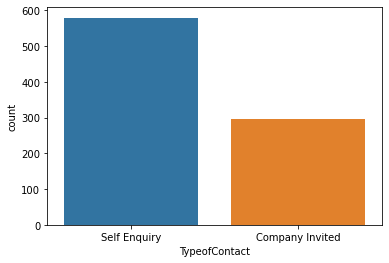

In [16]:
sns.countplot(Prod_Taken['TypeofContact'])

### Product Taken vs. Product Pitched

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

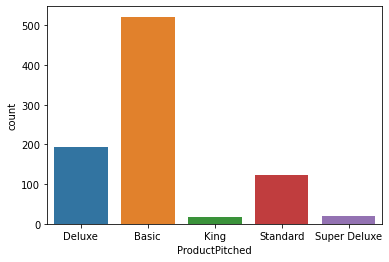

In [17]:
sns.countplot(Prod_Taken['ProductPitched'])

<AxesSubplot:xlabel='ProductPitched', ylabel='count'>

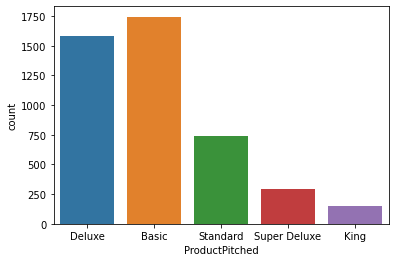

In [18]:
sns.countplot(df['ProductPitched'])

In [19]:
prod_pitched_taken = pd.DataFrame(Prod_Taken['ProductPitched'].value_counts(), index=None)
prod_pitched_general = pd.DataFrame(df['ProductPitched'].value_counts(), index=None)

In [20]:
#Counting how many of each product pitched were at the beginning, how many were bought and getting the difference between both
prod_pitched_difference = prod_pitched_taken.join(prod_pitched_general, how='left',lsuffix='_left', rsuffix='_right')
prod_pitched_difference['difference'] = prod_pitched_difference['ProductPitched_left']/prod_pitched_difference['ProductPitched_right']
prod_pitched_difference

,ProductPitched_left,ProductPitched_right,difference
Basic,522,1744,0.299312
Deluxe,193,1580,0.122152
Standard,123,741,0.165992
Super Deluxe,19,292,0.065068
King,17,148,0.114865


## Prot Taken vs. Monthly Income

<AxesSubplot:xlabel='ProdTaken', ylabel='MonthlyIncome'>

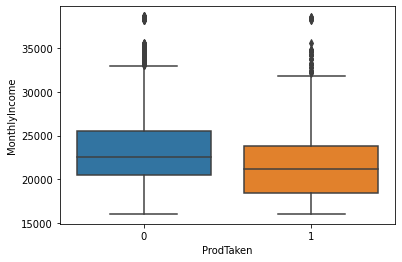

In [21]:
sns.boxplot(data=df,x='ProdTaken',y='MonthlyIncome')

## Correlation Analysis

In [22]:
df.drop('CustomerID',axis=1, inplace=True)

<AxesSubplot:>

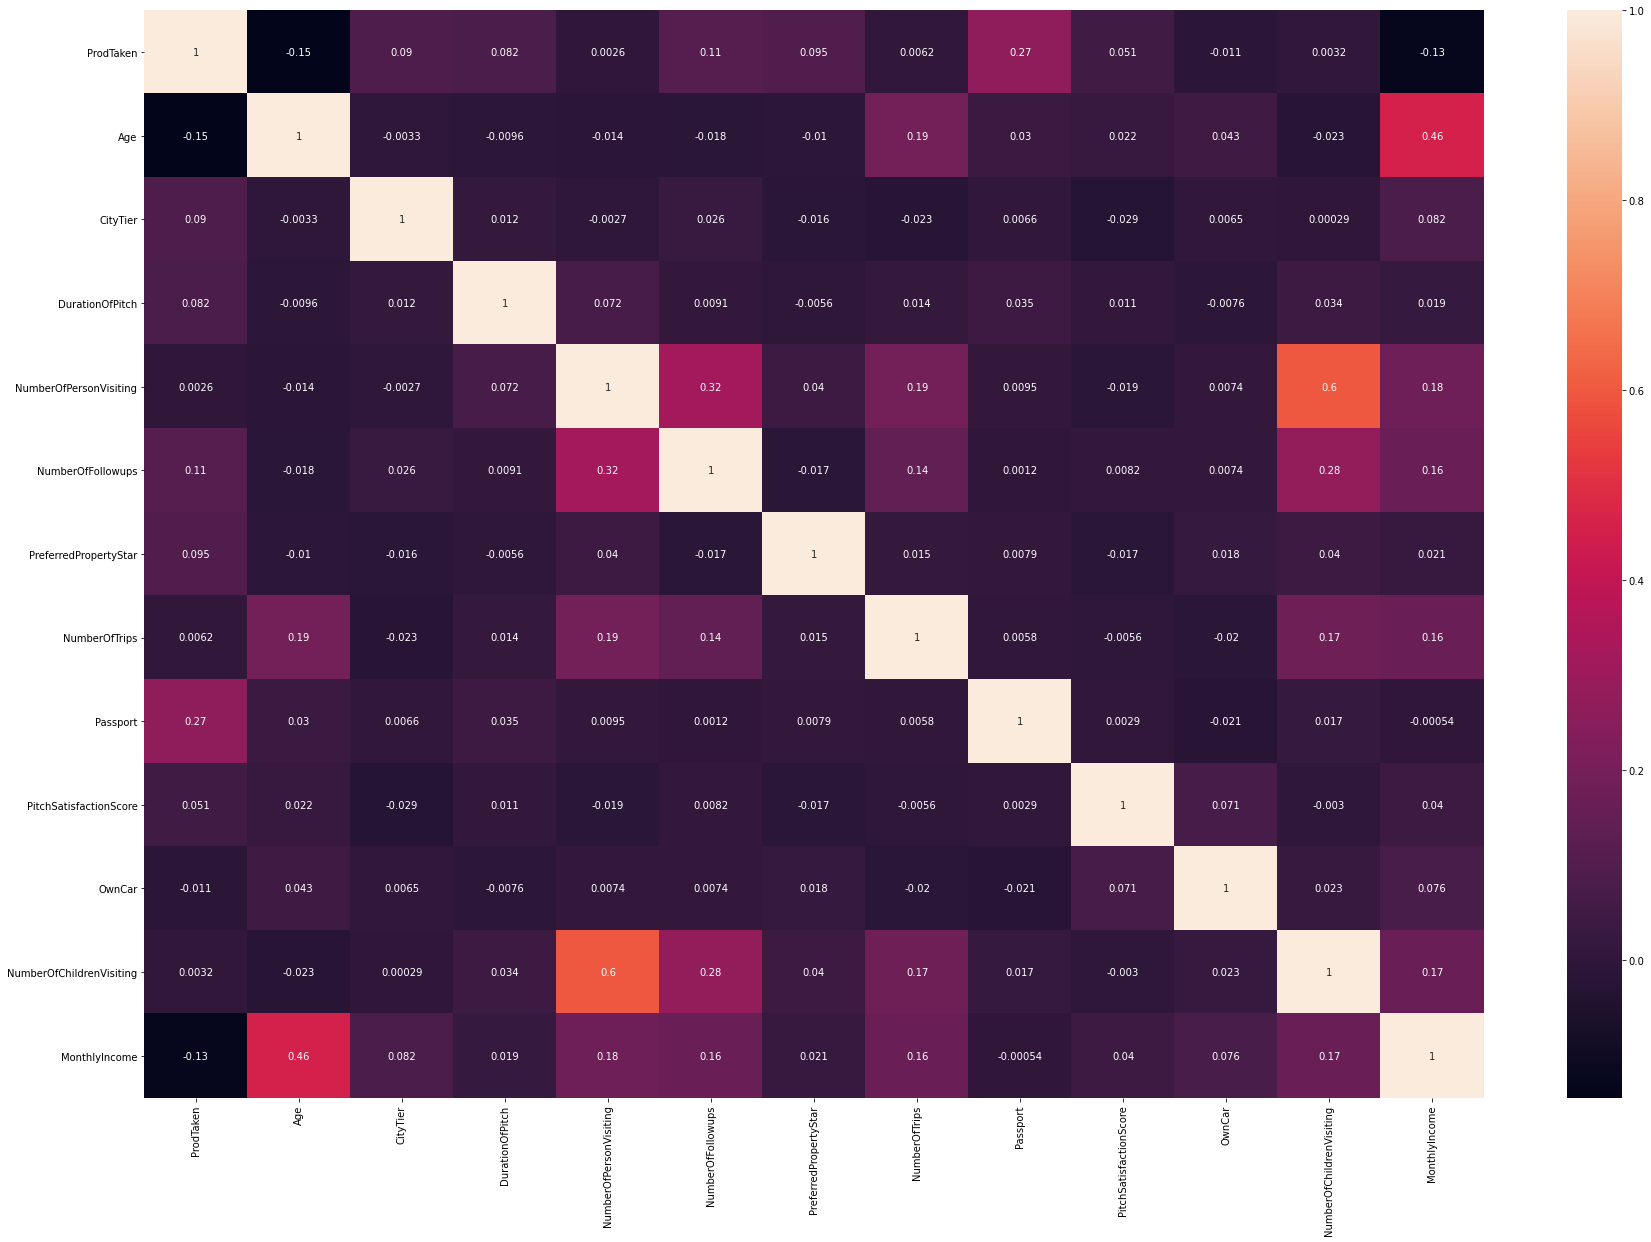

In [23]:
plt.subplots(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)

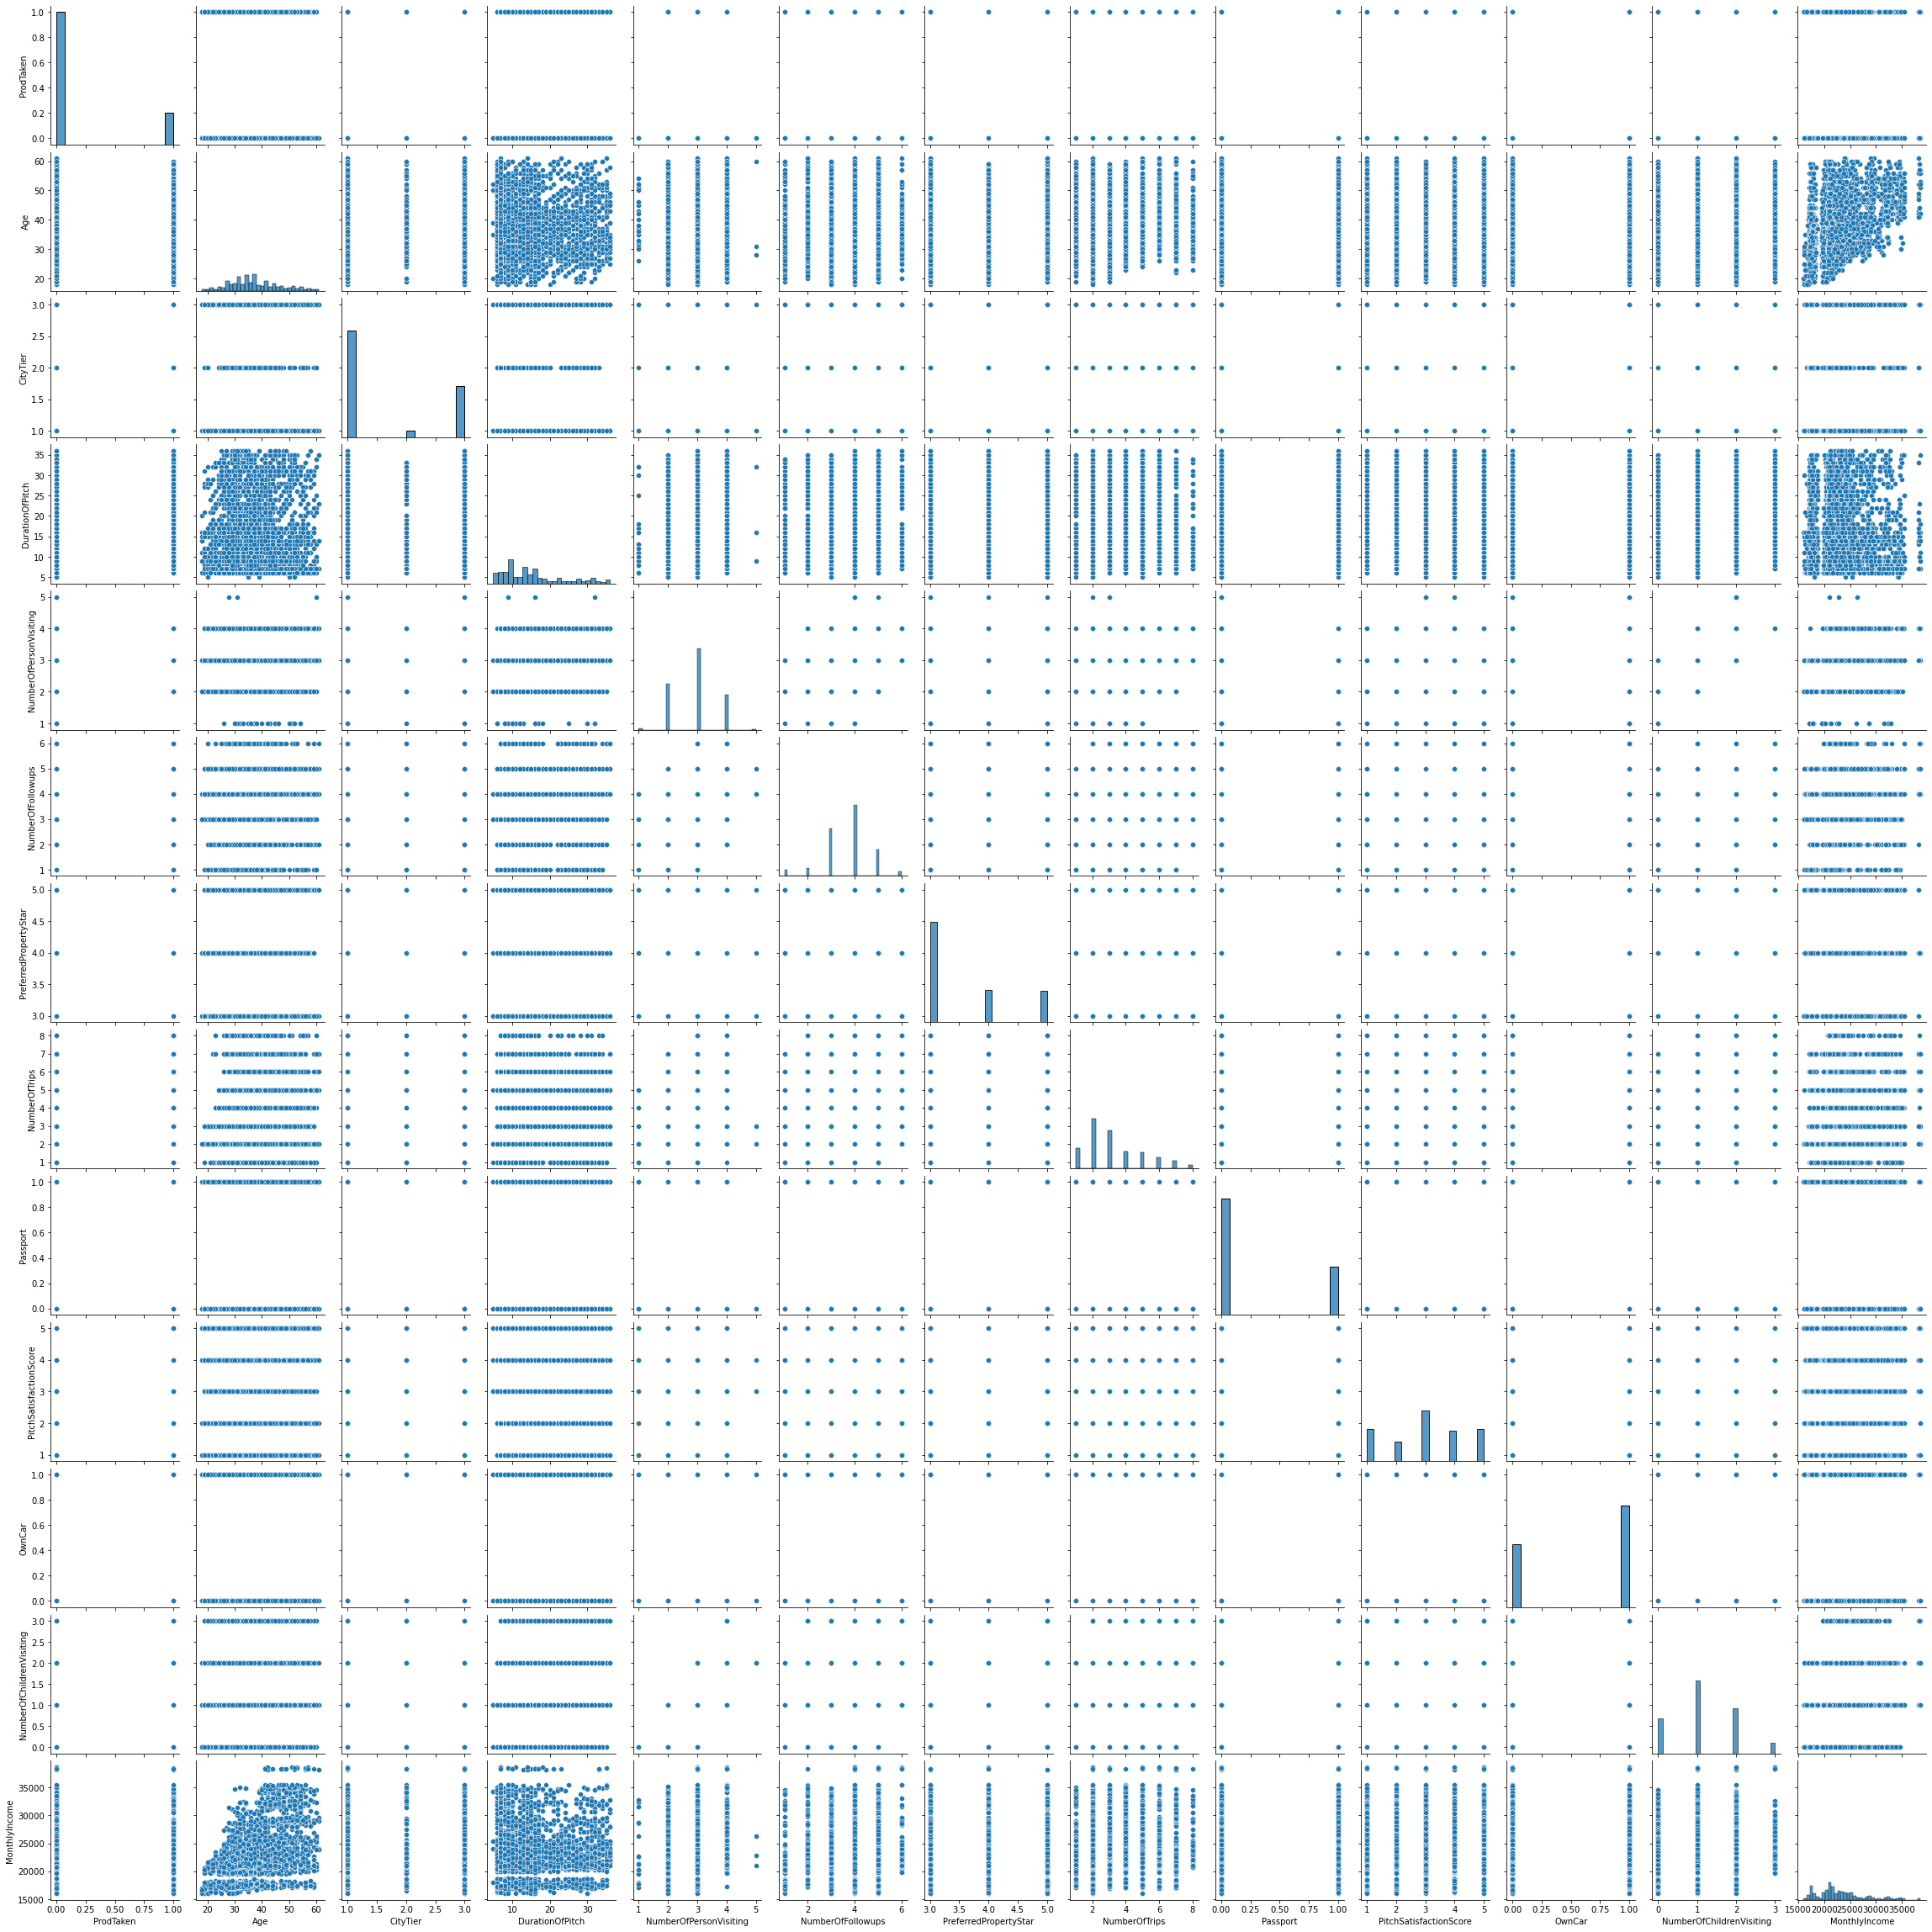

In [24]:
sns.pairplot(df)

## Findings:
1. The age for people who take the product is lower in general than the age of people who dont.
2. People who bought the product are younger in generl.
3. In general, longer pitches have higher success.
4. The mayority of people who bought the product are Male costumers.
5. From the people who have purchased a product before, almost 2/3 were Self Enquiry.
6. The highest conversion of products pitched go in the following order:
    1. Basic 29.9%
    2. Deluxe 11.6%
    3. Standard 16.5%
    4. King 8.6%
    5. Super Deluxe 5.8%
7. Income is not a factor since the average income of the people who bought products is lower than the average of the ones who didnt.
8. There is high correlation between Number of persons visiting and Number of children visiting.
9. There is high correlation between Age and Monthly Income.

# Dummies and scalable values

There are certain values which are categorical and can be scaled from worse to best. I will replace this values with numbers depending on their level of significance. Also I will create dummie variables for those columns which have different non scalable values.

In [25]:
df = pd.get_dummies(df, columns=['TypeofContact', 'Gender', 'Occupation', 'MaritalStatus', 'Designation'], drop_first=True)
df['ProductPitched'] = df['ProductPitched'].replace('Basic',1).replace('Standard',2).replace('Deluxe',3).replace('Super Deluxe',4).replace('King',5)

In [26]:
#The targuet variable will be wether the product was taken or not
x = df.drop('ProdTaken', axis=1)
y = df['ProdTaken']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

# Checking for Multicolinearity

In [27]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,1.388793,Age
1,1.132114,CityTier
2,1.021625,DurationOfPitch
3,1.837126,NumberOfPersonVisiting
4,1.211862,NumberOfFollowups
5,968.945654,ProductPitched
6,1.009603,PreferredPropertyStar
7,1.114006,NumberOfTrips
8,1.008574,Passport
9,1.015404,PitchSatisfactionScore


In [28]:
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              ProdTaken   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     34.80
Date:                Wed, 04 Aug 2021   Prob (F-statistic):          2.39e-141
Time:                        14:38:25   Log-Likelihood:                -1182.0
No. Observations:                3153   AIC:                             2414.
Df Residuals:                    3128   BIC:                             2565.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0031      0.001     -3.868      0.000      -0.005      -0.002
CityTier                       0.0731      0.007     10.016      0.000       0.059       0.087
DurationOfPitch                0.0044      0.001      5.651      0.000       0.003       0.006
NumberOfPersonVisiting        -0.0134      0.012     -1.122      0.262      -0.037       0.010
NumberOfFollowups              0.0518      0.007      7.520      0.000       0.038       0.065
ProductPitched                 0.0142      0.068      0.209      0.835      -0.119       0.148
PreferredPropertyStar          0.0549      0.008      6.894      0.000       0.039       0.071
NumberOfTrips                  0.0122      0.004      3.272      0.001       0.005       0.020
Passport                       0.2175      0.014     15.636      0.000       0.190       0.245
PitchSatisfactionScore         0.0166      0.005      3.527      0.000       0.007       0.026
OwnCar                        -0.0062      0.013     -0.473      0.636      -0.032       0.019
NumberOfChildrenVisiting      -0.0090      0.010     -0.937      0.349      -0.028       0.010
MonthlyIncome              -3.525e-06   3.12e-06     -1.129      0.259   -9.65e-06    2.59e-06
TypeofContact_Self Enquiry    -0.0413      0.014     -2.923      0.003      -0.069      -0.014
Gender_Male                    0.0352      0.013      2.733      0.006       0.010       0.061
Occupation_Large Business     -0.4058      0.253     -1.607      0.108      -0.901       0.089
Occupation_Salaried           -0.4521      0.252     -1.795      0.073      -0.946       0.042
Occupation_Small Business     -0.4639      0.252     -1.841      0.066      -0.958       0.030
MaritalStatus_Married          0.0133      0.017      0.783      0.434      -0.020       0.047
MaritalStatus_Single           0.1652      0.021      7.884      0.000       0.124       0.206
MaritalStatus_Unmarried        0.1021      0.022      4.562      0.000       0.058       0.146
Designation_Executive          0.1952      0.196      0.998      0.318      -0.188       0.579
Designation_Manager            0.0005      0.069      0.007      0.994      -0.135       0.136
Designation_Senior Manager     0.0864      0.133      0.650      0.516      -0.174       0.347
Designation_VP                 0.0973      0.081      1.196      0.232      -0.062       0.257
==============================================================================
Omnibus:                      515.749   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              797.253
Skew:                           1.196   Prob(JB):                    7.56e-174
Kurtosis:                       3.593   Cond. No.                     1.90e+06
============================

In [29]:
#First Fix
x = df.drop(['ProdTaken','Designation_Manager'], axis=1)
y = df['ProdTaken']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [30]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,24.490313,Age
1,4.822796,CityTier
2,4.798295,DurationOfPitch
3,31.428970,NumberOfPersonVisiting
4,17.580536,NumberOfFollowups
5,238.000768,ProductPitched
6,21.461759,PreferredPropertyStar
7,4.808398,NumberOfTrips
8,1.423431,Passport
9,6.165709,PitchSatisfactionScore


In [31]:
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              ProdTaken   R-squared (uncentered):                   0.365
Model:                            OLS   Adj. R-squared (uncentered):              0.360
Method:                 Least Squares   F-statistic:                              74.84
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                   3.28e-286
Time:                        14:38:26   Log-Likelihood:                         -1182.0
No. Observations:                3153   AIC:                                      2412.
Df Residuals:                    3129   BIC:                                      2557.
Df Model:                          24                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0031      0.001     -3.871      0.000      -0.005      -0.002
CityTier                       0.0731      0.007     10.034      0.000       0.059       0.087
DurationOfPitch                0.0044      0.001      5.655      0.000       0.003       0.006
NumberOfPersonVisiting        -0.0133      0.012     -1.135      0.257      -0.036       0.010
NumberOfFollowups              0.0518      0.007      7.571      0.000       0.038       0.065
ProductPitched                 0.0138      0.038      0.362      0.717      -0.061       0.088
PreferredPropertyStar          0.0549      0.008      6.922      0.000       0.039       0.070
NumberOfTrips                  0.0122      0.004      3.281      0.001       0.005       0.020
Passport                       0.2175      0.014     15.655      0.000       0.190       0.245
PitchSatisfactionScore         0.0166      0.005      3.532      0.000       0.007       0.026
OwnCar                        -0.0062      0.013     -0.474      0.636      -0.032       0.019
NumberOfChildrenVisiting      -0.0090      0.010     -0.939      0.348      -0.028       0.010
MonthlyIncome              -3.529e-06   3.08e-06     -1.144      0.253   -9.58e-06    2.52e-06
TypeofContact_Self Enquiry    -0.0413      0.014     -2.927      0.003      -0.069      -0.014
Gender_Male                    0.0352      0.013      2.740      0.006       0.010       0.060
Occupation_Large Business     -0.4041      0.102     -3.978      0.000      -0.603      -0.205
Occupation_Salaried           -0.4504      0.100     -4.526      0.000      -0.646      -0.255
Occupation_Small Business     -0.4622      0.100     -4.618      0.000      -0.658      -0.266
MaritalStatus_Married          0.0133      0.017      0.785      0.433      -0.020       0.047
MaritalStatus_Single           0.1652      0.021      7.905      0.000       0.124       0.206
MaritalStatus_Unmarried        0.1021      0.022      4.576      0.000       0.058       0.146
Designation_Executive          0.1939      0.074      2.608      0.009       0.048       0.340
Designation_Senior Manager     0.0855      0.053      1.606      0.108      -0.019       0.190
Designation_VP                 0.0976      0.063      1.561      0.119      -0.025       0.220
==============================================================================
Omnibus:                      515.733   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              797.218
Skew:                           1.196   Prob(JB):                    7.70e-174
Kurtosis:                       3.593   Cond. No.                     7.29e+05
========================

In [32]:
# Second Fix
x = df.drop(['ProdTaken','Designation_Manager','ProductPitched'], axis=1)
y = df['ProdTaken']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [33]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,23.971706,Age
1,4.821513,CityTier
2,4.798280,DurationOfPitch
3,30.369445,NumberOfPersonVisiting
4,17.176083,NumberOfFollowups
5,21.449654,PreferredPropertyStar
6,4.798341,NumberOfTrips
7,1.423419,Passport
8,6.151222,PitchSatisfactionScore
9,2.665827,OwnCar


In [34]:
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              ProdTaken   R-squared (uncentered):                   0.365
Model:                            OLS   Adj. R-squared (uncentered):              0.360
Method:                 Least Squares   F-statistic:                              78.11
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                   3.92e-287
Time:                        14:38:26   Log-Likelihood:                         -1182.1
No. Observations:                3153   AIC:                                      2410.
Df Residuals:                    3130   BIC:                                      2549.
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0031      0.001     -3.860      0.000      -0.005      -0.002
CityTier                       0.0731      0.007     10.046      0.000       0.059       0.087
DurationOfPitch                0.0044      0.001      5.654      0.000       0.003       0.006
NumberOfPersonVisiting        -0.0141      0.012     -1.217      0.224      -0.037       0.009
NumberOfFollowups              0.0514      0.007      7.591      0.000       0.038       0.065
PreferredPropertyStar          0.0550      0.008      6.936      0.000       0.039       0.071
NumberOfTrips                  0.0122      0.004      3.271      0.001       0.005       0.019
Passport                       0.2175      0.014     15.656      0.000       0.190       0.245
PitchSatisfactionScore         0.0167      0.005      3.552      0.000       0.007       0.026
OwnCar                        -0.0060      0.013     -0.461      0.644      -0.031       0.019
NumberOfChildrenVisiting      -0.0095      0.009     -1.010      0.313      -0.028       0.009
MonthlyIncome              -2.743e-06   2.19e-06     -1.251      0.211   -7.04e-06    1.56e-06
TypeofContact_Self Enquiry    -0.0412      0.014     -2.921      0.004      -0.069      -0.014
Gender_Male                    0.0353      0.013      2.742      0.006       0.010       0.060
Occupation_Large Business     -0.3779      0.071     -5.311      0.000      -0.517      -0.238
Occupation_Salaried           -0.4241      0.068     -6.250      0.000      -0.557      -0.291
Occupation_Small Business     -0.4358      0.069     -6.360      0.000      -0.570      -0.301
MaritalStatus_Married          0.0133      0.017      0.786      0.432      -0.020       0.047
MaritalStatus_Single           0.1660      0.021      7.980      0.000       0.125       0.207
MaritalStatus_Unmarried        0.1014      0.022      4.563      0.000       0.058       0.145
Designation_Executive          0.1677      0.018      9.519      0.000       0.133       0.202
Designation_Senior Manager     0.0676      0.019      3.489      0.000       0.030       0.106
Designation_VP                 0.1137      0.044      2.572      0.010       0.027       0.200
==============================================================================
Omnibus:                      514.761   Durbin-Watson:                   1.896
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.108
Skew:                           1.194   Prob(JB):                    2.21e-173
Kurtosis:                       3.591   Cond. No.                     4.47e+05
==============================================================================

Notes:
[1] R² is computed without cente

In [35]:
# Third Fix
x = df.drop(['ProdTaken','Designation_Manager','ProductPitched','OwnCar'], axis=1)
y = df['ProdTaken']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [36]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,23.967370,Age
1,4.821440,CityTier
2,4.798151,DurationOfPitch
3,30.368890,NumberOfPersonVisiting
4,17.176078,NumberOfFollowups
5,21.442830,PreferredPropertyStar
6,4.793078,NumberOfTrips
7,1.422860,Passport
8,6.124124,PitchSatisfactionScore
9,4.798562,NumberOfChildrenVisiting


In [37]:
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              ProdTaken   R-squared (uncentered):                   0.365
Model:                            OLS   Adj. R-squared (uncentered):              0.360
Method:                 Least Squares   F-statistic:                              81.67
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                   4.76e-288
Time:                        14:38:27   Log-Likelihood:                         -1182.2
No. Observations:                3153   AIC:                                      2408.
Df Residuals:                    3131   BIC:                                      2542.
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0031      0.001     -3.869      0.000      -0.005      -0.002
CityTier                       0.0731      0.007     10.042      0.000       0.059       0.087
DurationOfPitch                0.0044      0.001      5.653      0.000       0.003       0.006
NumberOfPersonVisiting        -0.0142      0.012     -1.223      0.221      -0.037       0.009
NumberOfFollowups              0.0514      0.007      7.591      0.000       0.038       0.065
PreferredPropertyStar          0.0549      0.008      6.925      0.000       0.039       0.070
NumberOfTrips                  0.0122      0.004      3.286      0.001       0.005       0.020
Passport                       0.2176      0.014     15.677      0.000       0.190       0.245
PitchSatisfactionScore         0.0166      0.005      3.534      0.000       0.007       0.026
NumberOfChildrenVisiting      -0.0095      0.009     -1.007      0.314      -0.028       0.009
MonthlyIncome              -2.758e-06   2.19e-06     -1.258      0.208   -7.06e-06    1.54e-06
TypeofContact_Self Enquiry    -0.0411      0.014     -2.915      0.004      -0.069      -0.013
Gender_Male                    0.0353      0.013      2.745      0.006       0.010       0.061
Occupation_Large Business     -0.3803      0.071     -5.361      0.000      -0.519      -0.241
Occupation_Salaried           -0.4265      0.068     -6.305      0.000      -0.559      -0.294
Occupation_Small Business     -0.4380      0.068     -6.407      0.000      -0.572      -0.304
MaritalStatus_Married          0.0134      0.017      0.792      0.428      -0.020       0.047
MaritalStatus_Single           0.1662      0.021      7.992      0.000       0.125       0.207
MaritalStatus_Unmarried        0.1013      0.022      4.560      0.000       0.058       0.145
Designation_Executive          0.1677      0.018      9.518      0.000       0.133       0.202
Designation_Senior Manager     0.0674      0.019      3.480      0.001       0.029       0.105
Designation_VP                 0.1130      0.044      2.560      0.011       0.026       0.200
==============================================================================
Omnibus:                      514.646   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.873
Skew:                           1.194   Prob(JB):                    2.49e-173
Kurtosis:                       3.589   Cond. No.                     4.46e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that 

In [38]:
# Fourth Fix
x = df.drop(['ProdTaken','Designation_Manager','ProductPitched','OwnCar', 'MaritalStatus_Married'], axis=1)
y = df['ProdTaken']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [39]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,23.966003,Age
1,4.818579,CityTier
2,4.798108,DurationOfPitch
3,30.355071,NumberOfPersonVisiting
4,17.175446,NumberOfFollowups
5,21.439795,PreferredPropertyStar
6,4.791312,NumberOfTrips
7,1.422804,Passport
8,6.116128,PitchSatisfactionScore
9,4.794780,NumberOfChildrenVisiting


In [40]:
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              ProdTaken   R-squared (uncentered):                   0.364
Model:                            OLS   Adj. R-squared (uncentered):              0.360
Method:                 Least Squares   F-statistic:                              85.54
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                   6.93e-289
Time:                        14:38:27   Log-Likelihood:                         -1182.5
No. Observations:                3153   AIC:                                      2407.
Df Residuals:                    3132   BIC:                                      2534.
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0031      0.001     -3.876      0.000      -0.005      -0.002
CityTier                       0.0729      0.007     10.026      0.000       0.059       0.087
DurationOfPitch                0.0044      0.001      5.639      0.000       0.003       0.006
NumberOfPersonVisiting        -0.0143      0.012     -1.233      0.218      -0.037       0.008
NumberOfFollowups              0.0514      0.007      7.594      0.000       0.038       0.065
PreferredPropertyStar          0.0550      0.008      6.942      0.000       0.039       0.071
NumberOfTrips                  0.0123      0.004      3.304      0.001       0.005       0.020
Passport                       0.2177      0.014     15.683      0.000       0.190       0.245
PitchSatisfactionScore         0.0164      0.005      3.498      0.000       0.007       0.026
NumberOfChildrenVisiting      -0.0093      0.009     -0.985      0.325      -0.028       0.009
MonthlyIncome              -2.793e-06   2.19e-06     -1.275      0.202   -7.09e-06     1.5e-06
TypeofContact_Self Enquiry    -0.0416      0.014     -2.952      0.003      -0.069      -0.014
Gender_Male                    0.0355      0.013      2.759      0.006       0.010       0.061
Occupation_Large Business     -0.3691      0.070     -5.310      0.000      -0.505      -0.233
Occupation_Salaried           -0.4153      0.066     -6.277      0.000      -0.545      -0.286
Occupation_Small Business     -0.4268      0.067     -6.381      0.000      -0.558      -0.296
MaritalStatus_Single           0.1568      0.017      9.170      0.000       0.123       0.190
MaritalStatus_Unmarried        0.0917      0.019      4.918      0.000       0.055       0.128
Designation_Executive          0.1673      0.018      9.502      0.000       0.133       0.202
Designation_Senior Manager     0.0678      0.019      3.503      0.000       0.030       0.106
Designation_VP                 0.1131      0.044      2.561      0.010       0.027       0.200
==============================================================================
Omnibus:                      514.495   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              794.546
Skew:                           1.194   Prob(JB):                    2.93e-173
Kurtosis:                       3.589   Cond. No.                     4.36e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 

In [41]:
# Fifth Fix
x = df.drop(['ProdTaken','Designation_Manager','ProductPitched','OwnCar', 'MaritalStatus_Married', 'NumberOfChildrenVisiting'], axis=1)
y = df['ProdTaken']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [42]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,23.880091,Age
1,4.818576,CityTier
2,4.797354,DurationOfPitch
3,22.394916,NumberOfPersonVisiting
4,17.045872,NumberOfFollowups
5,21.433691,PreferredPropertyStar
6,4.773061,NumberOfTrips
7,1.422485,Passport
8,6.116092,PitchSatisfactionScore
9,68.572542,MonthlyIncome


In [43]:
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              ProdTaken   R-squared (uncentered):                   0.364
Model:                            OLS   Adj. R-squared (uncentered):              0.360
Method:                 Least Squares   F-statistic:                              89.77
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                   1.17e-289
Time:                        14:38:27   Log-Likelihood:                         -1183.0
No. Observations:                3153   AIC:                                      2406.
Df Residuals:                    3133   BIC:                                      2527.
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0031      0.001     -3.816      0.000      -0.005      -0.001
CityTier                       0.0730      0.007     10.034      0.000       0.059       0.087
DurationOfPitch                0.0044      0.001      5.650      0.000       0.003       0.006
NumberOfPersonVisiting        -0.0201      0.010     -2.029      0.043      -0.040      -0.001
NumberOfFollowups              0.0509      0.007      7.538      0.000       0.038       0.064
PreferredPropertyStar          0.0549      0.008      6.927      0.000       0.039       0.070
NumberOfTrips                  0.0121      0.004      3.251      0.001       0.005       0.019
Passport                       0.2176      0.014     15.674      0.000       0.190       0.245
PitchSatisfactionScore         0.0164      0.005      3.498      0.000       0.007       0.026
MonthlyIncome              -2.987e-06   2.18e-06     -1.369      0.171   -7.27e-06    1.29e-06
TypeofContact_Self Enquiry    -0.0413      0.014     -2.932      0.003      -0.069      -0.014
Gender_Male                    0.0348      0.013      2.713      0.007       0.010       0.060
Occupation_Large Business     -0.3575      0.069     -5.218      0.000      -0.492      -0.223
Occupation_Salaried           -0.4035      0.065     -6.201      0.000      -0.531      -0.276
Occupation_Small Business     -0.4150      0.066     -6.307      0.000      -0.544      -0.286
MaritalStatus_Single           0.1570      0.017      9.182      0.000       0.123       0.191
MaritalStatus_Unmarried        0.0908      0.019      4.874      0.000       0.054       0.127
Designation_Executive          0.1669      0.018      9.482      0.000       0.132       0.201
Designation_Senior Manager     0.0684      0.019      3.535      0.000       0.030       0.106
Designation_VP                 0.1140      0.044      2.581      0.010       0.027       0.201
==============================================================================
Omnibus:                      515.107   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              795.860
Skew:                           1.195   Prob(JB):                    1.52e-173
Kurtosis:                       3.591   Cond. No.                     4.29e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.29e+05. This might indicate that there are
strong multicollinearity or other numerical proble

In [44]:
# Sixth Fix
x = df.drop(['ProdTaken','Designation_Manager','ProductPitched','OwnCar', 'MaritalStatus_Married', 'NumberOfChildrenVisiting', 'MonthlyIncome'], axis=1)
y = df['ProdTaken']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [45]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

,VIF Factor,features
0,22.047454,Age
1,4.816274,CityTier
2,4.794420,DurationOfPitch
3,20.621256,NumberOfPersonVisiting
4,16.637607,NumberOfFollowups
5,21.424883,PreferredPropertyStar
6,4.749443,NumberOfTrips
7,1.421829,Passport
8,6.103720,PitchSatisfactionScore
9,3.474577,TypeofContact_Self Enquiry


In [46]:
model = sm.OLS(y_train,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              ProdTaken   R-squared (uncentered):                   0.364
Model:                            OLS   Adj. R-squared (uncentered):              0.360
Method:                 Least Squares   F-statistic:                              94.37
Date:                Wed, 04 Aug 2021   Prob (F-statistic):                   2.99e-290
Time:                        14:38:28   Log-Likelihood:                         -1183.9
No. Observations:                3153   AIC:                                      2406.
Df Residuals:                    3134   BIC:                                      2521.
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Age                           -0.0034      0.001     -4.414      0.000      -0.005      -0.002
CityTier                       0.0733      0.007     10.072      0.000       0.059       0.088
DurationOfPitch                0.0044      0.001      5.624      0.000       0.003       0.006
NumberOfPersonVisiting        -0.0241      0.009     -2.534      0.011      -0.043      -0.005
NumberOfFollowups              0.0495      0.007      7.416      0.000       0.036       0.063
PreferredPropertyStar          0.0547      0.008      6.903      0.000       0.039       0.070
NumberOfTrips                  0.0118      0.004      3.182      0.001       0.005       0.019
Passport                       0.2171      0.014     15.640      0.000       0.190       0.244
PitchSatisfactionScore         0.0161      0.005      3.434      0.001       0.007       0.025
TypeofContact_Self Enquiry    -0.0417      0.014     -2.961      0.003      -0.069      -0.014
Gender_Male                    0.0348      0.013      2.709      0.007       0.010       0.060
Occupation_Large Business     -0.3971      0.062     -6.393      0.000      -0.519      -0.275
Occupation_Salaried           -0.4436      0.058     -7.629      0.000      -0.558      -0.330
Occupation_Small Business     -0.4544      0.059     -7.678      0.000      -0.570      -0.338
MaritalStatus_Single           0.1560      0.017      9.130      0.000       0.122       0.189
MaritalStatus_Unmarried        0.0904      0.019      4.851      0.000       0.054       0.127
Designation_Executive          0.1781      0.016     11.412      0.000       0.147       0.209
Designation_Senior Manager     0.0612      0.019      3.287      0.001       0.025       0.098
Designation_VP                 0.0840      0.038      2.191      0.029       0.009       0.159
==============================================================================
Omnibus:                      518.185   Durbin-Watson:                   1.899
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              802.467
Skew:                           1.198   Prob(JB):                    5.58e-175
Kurtosis:                       3.606   Cond. No.                         683.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Removing different Columns which presented a p-value bigger than 0.5 I got a better R-Squared value (0.36) than the one I got at the beginning (0.21).

There are still some VIF values above 10 but we will ignore them sinche they have a p-value lower than 0.05.

# Model Building - Bagging

It is more important to predict the highest ammount of people who will buy so I will focus on the Precission.

I will find through Grid Searches which are the best Hyper-parameters for each of the models in Bagging and Boosting.

## Random Forest

In [47]:
rf_tuned = RandomForestClassifier(class_weight={0:0.22,1:0.78},random_state=1)

parameters = {  
                'max_depth': list(np.arange(3,10,1)),
                'max_features': np.arange(0.6,1.1,0.1),
                'max_samples': np.arange(0.7,1.1,0.1),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(30,160,20),
                'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
}



scorer = metrics.make_scorer(metrics.recall_score)


grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer,cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)


rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.22, 1: 0.78}, max_depth=9,
                       max_features=0.7, max_samples=0.9999999999999999,
                       min_impurity_decrease=0.0001, min_samples_split=17,
                       n_estimators=30, random_state=1)

In [48]:
pred_train = rf_tuned.predict(x_train)
pred_test = rf_tuned.predict(x_test)
print(metrics.recall_score(y_train, pred_train))
print(metrics.recall_score(y_test, pred_test))
print(metrics.precision_score(y_train, pred_train))
print(metrics.precision_score(y_test, pred_test))
print(metrics.accuracy_score(y_train, pred_train))
print(metrics.accuracy_score(y_test, pred_test))

0.8666666666666667
0.6640926640926641
0.7884615384615384
0.669260700389105
0.928639391056137
0.8727810650887574


## Bagging

In [49]:
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)


bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(x_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [50]:
pred_train = bagging_estimator_tuned.predict(x_train)
pred_test = bagging_estimator_tuned.predict(x_test)
print(metrics.recall_score(y_train, pred_train))
print(metrics.recall_score(y_test, pred_test))
print(metrics.precision_score(y_train, pred_train))
print(metrics.precision_score(y_test, pred_test))
print(metrics.accuracy_score(y_train, pred_train))
print(metrics.accuracy_score(y_test, pred_test))

0.9983739837398374
0.7297297297297297
1.0
0.8915094339622641
0.9996828417380272
0.9312130177514792


# Model Building - Boosting

## Ada Boosting

In [51]:
abc_tuned = AdaBoostClassifier(random_state=1)

parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}


scorer = metrics.make_scorer(metrics.f1_score)


grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)


abc_tuned = grid_obj.best_estimator_
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1.4000000000000001, n_estimators=90,
                   random_state=1)

In [52]:
pred_train = abc_tuned.predict(x_train)
pred_test = abc_tuned.predict(x_test)
print(metrics.recall_score(y_train, pred_train))
print(metrics.recall_score(y_test, pred_test))
print(metrics.precision_score(y_train, pred_train))
print(metrics.precision_score(y_test, pred_test))
print(metrics.accuracy_score(y_train, pred_train))
print(metrics.accuracy_score(y_test, pred_test))

0.8926829268292683
0.640926640926641
0.9597902097902098
0.7063829787234043
0.9717729146844275
0.8801775147928994


## Gradient Boosting

In [53]:
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(max_features=0.8, n_estimators=250, random_state=1,
                           subsample=0.9)

In [54]:
pred_train = abc_tuned.predict(x_train)
pred_test = abc_tuned.predict(x_test)
print(metrics.recall_score(y_train, pred_train))
print(metrics.recall_score(y_test, pred_test))
print(metrics.precision_score(y_train, pred_train))
print(metrics.precision_score(y_test, pred_test))
print(metrics.accuracy_score(y_train, pred_train))
print(metrics.accuracy_score(y_test, pred_test))

0.8926829268292683
0.640926640926641
0.9597902097902098
0.7063829787234043
0.9717729146844275
0.8801775147928994


## XGBoosting

In [55]:
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
    }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer, cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=2, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [56]:
pred_train = xgb_tuned.predict(x_train)
pred_test = xgb_tuned.predict(x_test)
print(metrics.recall_score(y_train, pred_train))
print(metrics.recall_score(y_test, pred_test))
print(metrics.precision_score(y_train, pred_train))
print(metrics.precision_score(y_test, pred_test))
print(metrics.accuracy_score(y_train, pred_train))
print(metrics.accuracy_score(y_test, pred_test))

0.9560975609756097
0.7335907335907336
0.9702970297029703
0.811965811965812
0.9857278782112274
0.9164201183431953


In [57]:
pd.DataFrame(xgb_tuned.feature_importances_, columns=['Imp'], index=x_train.columns).sort_values(by='Imp', ascending=False)

,Imp
Passport,0.141574
Designation_Executive,0.099664
MaritalStatus_Single,0.065658
CityTier,0.058972
Occupation_Large Business,0.054986
MaritalStatus_Unmarried,0.053005
NumberOfFollowups,0.052643
Designation_Senior Manager,0.047760
Age,0.047003
PitchSatisfactionScore,0.043377


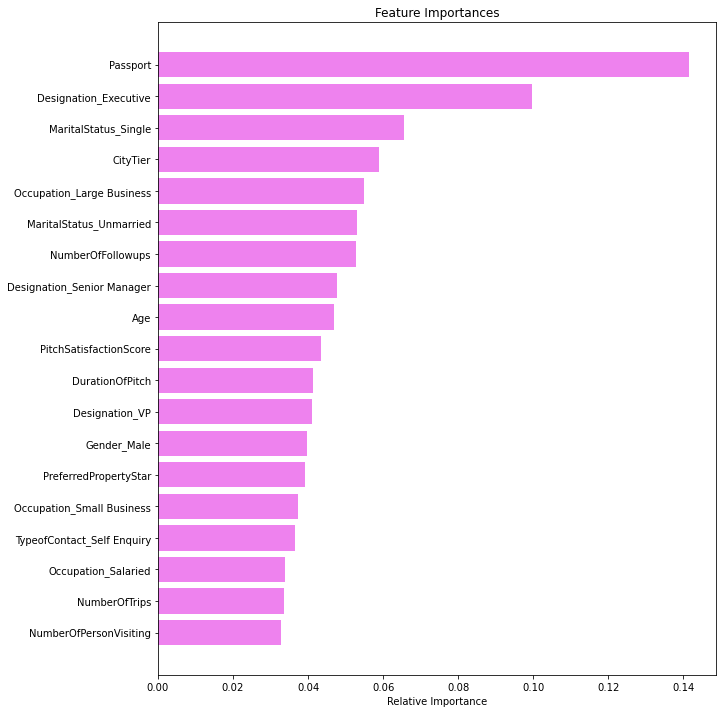

In [58]:
feature_names = x_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The best scores come from the Bagging model but ias we can see from the scores it is overfitted. The second best model (score-wise) is the XGBoosting and the scores tell us its not overfitting so this is the model I will use.

# Actionable Insights & Recommendations

As shown before, the most important characteristics they should look out for are: 

1. If they do have a passport.
2. If the job designation is Executive.
3. If they are single.
4. High city Tier.
5. If the occupation is in a Large Business.

Other than those factors, there is multicolinearity with the following values: ProdTaken, Designation_Manager, ProductPitched, OwnCar, MaritalStatus_Married, NumberOfChildrenVisiting, MonthlyIncome. There is high correlation between Products beeing taken and all of these factors so that is something that should be considered when predicting if someone will buy a product or not.

I recommend using the XGBoosting prediction model as it returned an 81% Precission Score (Best out of all 5 models) which is what was most important.